In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [9]:
df = pd.read_csv(r"C:\Users\U6056186\Downloads\train.csv",usecols=[1,5,9])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [56]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [57]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [58]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [59]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

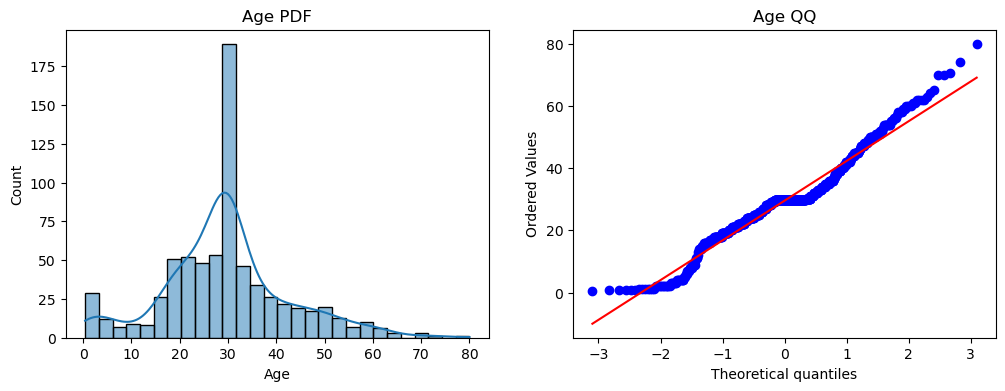

In [61]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(X_train['Age'],kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ')
plt.show()

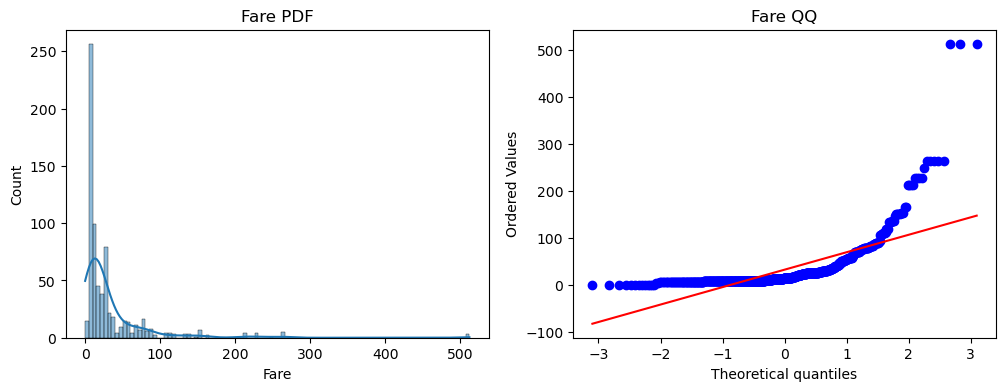

In [62]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ')
plt.show()

In [63]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [64]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)


In [67]:
print('Log Acc',accuracy_score(y_test,y_pred))
print('DT Acc',accuracy_score(y_test,y_pred2))

Log Acc 0.6480446927374302
DT Acc 0.659217877094972


In [68]:
ftrf = FunctionTransformer(func=np.log1p)

In [70]:
X_train_trf = ftrf.fit_transform(X_train)
X_test_trf = ftrf.transform(X_test)

In [72]:
clf.fit(X_train_trf,y_train)
clf2.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [73]:
y_pred = clf.predict(X_test_trf)
y_pred2 = clf2.predict(X_test_trf)

In [74]:
print('Log Acc',accuracy_score(y_test,y_pred))
print('DT Acc',accuracy_score(y_test,y_pred2))

Log Acc 0.6815642458100558
DT Acc 0.664804469273743


In [78]:
X_trf = ftrf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR 10 Cross mean",
      np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10)))

print("DT 10 Cross mean",
      np.mean(cross_val_score(clf2,X_trf,y,scoring='accuracy',cv=10)))

LR 10 Cross mean 0.678027465667915
DT 10 Cross mean 0.6633083645443196


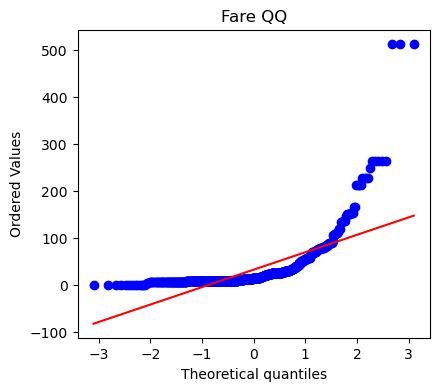

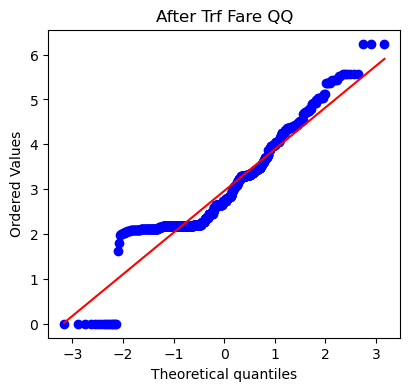

In [87]:
plt.figure(figsize=(10,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ')
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(122)
stats.probplot(X_trf['Fare'],dist='norm',plot=plt)
plt.title('After Trf Fare QQ')
plt.show()

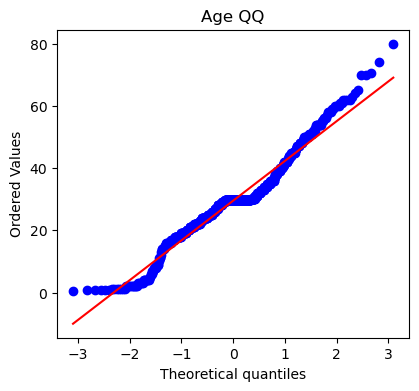

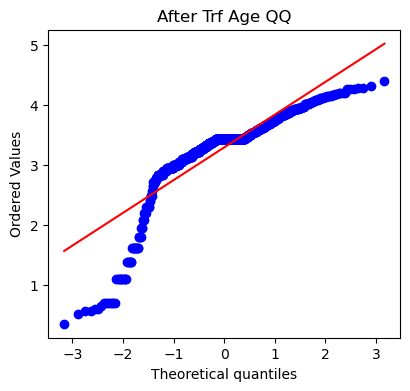

In [88]:
plt.figure(figsize=(10,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ')
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(122)
stats.probplot(X_trf['Age'],dist='norm',plot=plt)
plt.title('After Trf Age QQ')
plt.show()